# Worksheet

## Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

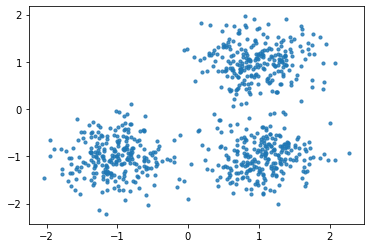

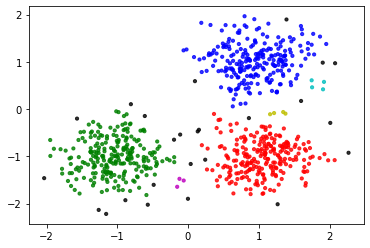

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()
#Lance's code typed and commented by Megha

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = [-1 for _ in range(len(self.dataset))]
        #added to mark if it is still unassigned

    def is_unassigned(self, i):
        return self.assignments[i] == -1 
        #returns true if it is still unassigned

    def dist(self,i,j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])
    
    def generate_cluster(self, i, cluster_num):
        #we need to look at the neighborhood and assign all points to that cluster
        #step 3 of the algorithm, page 16 of lecture 6 slides
        potential_cluster = self.get_neighborhood(i)
        #get neighbors

        while potential_cluster:
        #while list has remaining items
            pt = potential_cluster.pop()
            #pop last element out of this list
            if self.is_core(pt) and self.is_unassigned(pt):
            #if core point and it is unassigned
                new_neighbors = self.get_neighborhood(pt)
                #get it's neighbors
                potential_cluster += [p for p in new_neighbors if self.is_unassigned and p != pt]
                #add it's neighbors to the neighborhood list if they are unassigned
            self.assignments[pt] = cluster_num
            #assign point to cluster

    
    def is_core(self,i):
        return len(self.get_neighborhood(i)) >= self.min_pts
        #returns if we have a core point or not by meeting the min pts requirement
         
    def get_neighborhood(self,i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if self.dist(i,j) <= self.epsilon:
            #if distance between these 2 pts is less than the epsilon needed to be a neighbor
                neighborhood.append(j)
                #add to neighborhood list
        return neighborhood   
        #return neighborhood
    
    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        cluster_num = 0
        #start with a cluster_num of 0
        for i in range(len(self.dataset)):
            if self.is_unassigned(i) and self.is_core(i):
            # if point is core AND unassigned
                self.generate_cluster(i, cluster_num)
                #generate cluster
                cluster_num += 1
                #increment cluster_num everytime we generate and implement a new cluster
            #else, move on to next data point
            
        return self.assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()